# TimeSeries Analysis of Turbofan dataset

In this notebook we'll apply lagged information from the dataset features to introduce valuable information and improve the predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

First, load the datasets we'll use from notebook "Datasets"

In [2]:
%store -r df_train_1
%store -r df_test_1
%store -r df_RUL_1

In [3]:
df_train_1

,ID,Cycle,operarional_setting_1,operarional_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


In [4]:
df_test_1

,ID,Cycle,operarional_setting_1,operarional_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393,39.08,23.4166
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391,39.00,23.3737
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8.4715,394,38.65,23.1974
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8.4512,395,38.57,23.2771
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8.4569,395,38.62,23.2051
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8.4711,395,38.66,23.2699


In [5]:
df_RUL_1

,RUL
0,112
1,98
2,69
3,82
4,91
5,93
6,91
7,95
8,111
9,96


### Add lagged variables

We'll include previous value from each sensor, adding new column for each feature with "lagged" version, for both train and test

In [6]:
df1_L1 = df_train_1.copy()
sensor_cols = df_train_1.columns[2:len(df_train_1.columns)-1]
lag_cols = []
for col in sensor_cols:
    col = col + "_lag1"
    lag_cols.append(col)
df1_L1[lag_cols] = df_train_1.groupby("ID")[sensor_cols].shift(1)
df1_L1.dropna(inplace=True)
df1_L1

,ID,Cycle,operarional_setting_1,operarional_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,RUL,operarional_setting_1_lag1,operarional_setting_2_lag1,sensor_measurement_2_lag1,sensor_measurement_3_lag1,sensor_measurement_4_lag1,sensor_measurement_7_lag1,sensor_measurement_8_lag1,sensor_measurement_9_lag1,sensor_measurement_11_lag1,sensor_measurement_12_lag1,sensor_measurement_13_lag1,sensor_measurement_15_lag1,sensor_measurement_17_lag1,sensor_measurement_20_lag1,sensor_measurement_21_lag1
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392.0,39.06,23.4190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392.0,39.00,23.4236
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390.0,38.95,23.3442
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392.0,38.88,23.3739
5,1,6,-0.0043,-0.0001,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8.4108,391,38.98,23.3669,186,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4,-0.0002,-0.0001,643.41,1600.04,1431.90,551.42,2388.23,9069.69,48.22,519.71,2388.28,8.5519,394.0,38.14,23.1923
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397.0,38.49,22.9735
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395.0,38.30,23.1594
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398.0,38.44,22.9333


In [7]:
df1t_L1 = df_test_1.copy()
sensor_cols = df_test_1.columns[2:len(df_test_1.columns)]
lag_cols = []
for col in sensor_cols:
    col = col + "_lag1"
    lag_cols.append(col)
df1t_L1[lag_cols] = df_test_1.groupby("ID")[sensor_cols].shift(1)
df1t_L1.dropna(inplace=True)
df1t_L1

,ID,Cycle,operarional_setting_1,operarional_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,operarional_setting_1_lag1,operarional_setting_2_lag1,sensor_measurement_2_lag1,sensor_measurement_3_lag1,sensor_measurement_4_lag1,sensor_measurement_7_lag1,sensor_measurement_8_lag1,sensor_measurement_9_lag1,sensor_measurement_11_lag1,sensor_measurement_12_lag1,sensor_measurement_13_lag1,sensor_measurement_15_lag1,sensor_measurement_17_lag1,sensor_measurement_20_lag1,sensor_measurement_21_lag1
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393,39.02,23.3916,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8.4052,392.0,38.86,23.3735
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393.0,39.02,23.3916
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393.0,39.08,23.4166
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391.0,39.00,23.3737
5,1,6,0.0012,0.0003,642.11,1579.12,1395.13,554.22,2388.00,9050.96,47.26,521.92,2388.08,8.4238,392,38.91,23.3467,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8.4715,394,38.65,23.1974,0.0018,0.0004,643.10,1595.60,1414.62,553.18,2388.08,9139.88,47.58,521.37,2388.05,8.4429,395.0,38.63,23.2952
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8.4512,395,38.57,23.2771,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8.4715,394.0,38.65,23.1974
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8.4569,395,38.62,23.2051,-0.0011,-0.0001,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8.4512,395.0,38.57,23.2771
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8.4711,395,38.66,23.2699,-0.0006,-0.0003,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8.4569,395.0,38.62,23.2051


Define tran/test stplit and run predictions

In [8]:
X_trainL = df1_L1.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1","RUL"], axis=1)
y_trainL = df1_L1["RUL"]

df_test_1_redL = df1t_L1.groupby("ID").last().reset_index()
X_testL = df_test_1_redL.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1"], axis=1)
y_testL = df_RUL_1

#### Linear Regression

In [9]:
lr = LinearRegression()
lr.fit(X_trainL, y_trainL)

LinearRegression()

In [10]:
preds_y_train = lr.predict(X_trainL)
print("TRAIN SCORES - - - - ", "\n",
    "MAE: ", median_absolute_error(y_trainL,preds_y_train), "\n",
      "MSE: ", mean_squared_error(y_trainL, preds_y_train), "\n",
      "RMSE: ",np.sqrt(mean_squared_error(y_trainL, preds_y_train)), "\n",
      "R2 score: ", r2_score(y_trainL, preds_y_train))

TRAIN SCORES - - - -  
 MAE:  24.567832905428077 
 MSE:  1549.885454180163 
 RMSE:  39.368584609815 
 R2 score:  0.6709780456463497


In [11]:
preds_y_test = lr.predict(X_testL)
print("TEST SCORES - - - - ", "\n",
    "MAE: ", median_absolute_error(y_testL, preds_y_test), "\n",
      "MSE: ", mean_squared_error(y_testL, preds_y_test), "\n",
      "RMSE: ",np.sqrt(mean_squared_error(y_testL, preds_y_test)), "\n",
      "R2 score: ", r2_score(y_testL, preds_y_test))

TEST SCORES - - - -  
 MAE:  25.708423645561197 
 MSE:  987.3611905205231 
 RMSE:  31.422304029471217 
 R2 score:  0.4282363934598633


#### RandomForest

In [ ]:
X_trainL = df1_L1.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1","RUL"], axis=1)
y_trainL = df1_L1["RUL"]

df_test_1_redL = df1t_L1.groupby("ID").last().reset_index()
X_testL = df_test_1_redL.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1"], axis=1)
y_testL = df_RUL_1

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]}


In [13]:
regr = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=regr, param_distributions=random_grid, random_state=42)
rf_random.fit(X_trainL, y_trainL)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42)

In [14]:
n_estimators = list(rf_random.best_params_.values())[0]
max_depth = list(rf_random.best_params_.values())[1]
hyper_regr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
hyper_regr.fit(X_trainL, y_trainL)

RandomForestRegressor(max_depth=10, n_estimators=50)

In [15]:
rul_train_pred_rf = hyper_regr.predict(X_trainL)
print("RANDOM FOREST TRAIN SCORES - - - - ", "\n",
    "MAE: ", mean_absolute_error(y_trainL, rul_train_pred_rf), "\n",
      "R2 score: ", r2_score(y_trainL, rul_train_pred_rf))

RANDOM FOREST TRAIN SCORES - - - -  
 MAE:  12.213960310028996 
 R2 score:  0.941069870531151


In [16]:
rul_test_pred_rf = hyper_regr.predict(X_testL)
print("RANDOM FOREST TEST SCORES - - - - ", "\n",
    "MAE: ", mean_absolute_error(y_testL, rul_test_pred_rf), "\n",
      "R2 score: ", r2_score(y_testL, rul_test_pred_rf))

RANDOM FOREST TEST SCORES - - - -  
 MAE:  21.835221106140892 
 R2 score:  0.40499936353065846


#### SVR

In [49]:
X_trainL = df1_L1.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1","RUL"], axis=1)
y_trainL = df1_L1["RUL"]

df_test_1_redL = df1t_L1.groupby("ID").last().reset_index()
X_testL = df_test_1_redL.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1"], axis=1)
y_testL = df_RUL_1

In [52]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_trainL)
X_train_scal = scaler.transform(X_trainL)
X_test_scal = scaler.transform(X_testL)

In [54]:
svr = SVR(kernel="linear")
svr.fit(X_train_scal, y_trainL)

SVR(kernel='linear')

In [55]:
rul_train_pred_svr = svr.predict(X_train_scal)
print("RANDOM FOREST TRAIN SCORES - - - - ", "\n",
    "MAE: ", mean_absolute_error(y_trainL, rul_train_pred_svr), "\n",
      "R2 score: ", r2_score(y_trainL, rul_train_pred_svr))

RANDOM FOREST TRAIN SCORES - - - -  
 MAE:  29.90806108661248 
 R2 score:  0.6576577831376187


In [58]:
rul_test_pred_svr = svr.predict(X_test_scal)
print("RANDOM FOREST TEST SCORES - - - - ", "\n",
    "MAE: ", mean_absolute_error(y_testL, rul_test_pred_svr), "\n",
      "R2 score: ", r2_score(rul_test_pred_svr, y_testL))

RANDOM FOREST TEST SCORES - - - -  
 MAE:  22.467592433555918 
 R2 score:  0.6109392055610878


### Add more lags

We'll now include a second lag, which will provide inmediate before previous value for each sensor. This will increase further the number of variables. Let's check how it affects the metrics

In [17]:
df1_L2 = df1_L1.copy()
sensor_cols_2 = df_train_1.columns[2:len(df_train_1.columns)-1]
lag_cols_2 = []
for col in sensor_cols_2:
    col = col + "_lag2"
    lag_cols_2.append(col)
df1_L2[lag_cols_2] = df_train_1.groupby("ID")[sensor_cols_2].shift(2)
df1_L2.dropna(inplace=True)
df1_L2

,ID,Cycle,operarional_setting_1,operarional_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,RUL,operarional_setting_1_lag1,operarional_setting_2_lag1,sensor_measurement_2_lag1,sensor_measurement_3_lag1,sensor_measurement_4_lag1,sensor_measurement_7_lag1,sensor_measurement_8_lag1,sensor_measurement_9_lag1,sensor_measurement_11_lag1,sensor_measurement_12_lag1,sensor_measurement_13_lag1,sensor_measurement_15_lag1,sensor_measurement_17_lag1,sensor_measurement_20_lag1,sensor_measurement_21_lag1,operarional_setting_1_lag2,operarional_setting_2_lag2,sensor_measurement_2_lag2,sensor_measurement_3_lag2,sensor_measurement_4_lag2,sensor_measurement_7_lag2,sensor_measurement_8_lag2,sensor_measurement_9_lag2,sensor_measurement_11_lag2,sensor_measurement_12_lag2,sensor_measurement_13_lag2,sensor_measurement_15_lag2,sensor_measurement_17_lag2,sensor_measurement_20_lag2,sensor_measurement_21_lag2
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392.0,39.00,23.4236,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392.0,39.06,23.4190
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390.0,38.95,23.3442,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392.0,39.00,23.4236
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392.0,38.88,23.3739,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390.0,38.95,23.3442
5,1,6,-0.0043,-0.0001,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8.4108,391,38.98,23.3669,186,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393.0,38.90,23.4044,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392.0,38.88,23.3739
6,1,7,0.0010,0.0001,642.48,1592.32,1397.77,554.34,2388.02,9059.13,47.36,522.32,2388.03,8.3974,392,39.10,23.3774,185,-0.0043,-0.0001,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8.4108,391.0,38.98,23.3669,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4,-0.0002,-0.0001,643.41,1600.04,1431.90,551.42,2388.23,9069.69,48.22,519.71,2388.28,8.5519,394.0,38.14,23.1923,-0.0011,0.0003,643.72,1597.29,1427.41,551.99,2388.23,9068.85,48.12,519.55,2388.22,8.5215,394.0,38.38,23.1324
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397.0,38.49,22.9735,-0.0002,-0.0001,643.41,1600.04,1431.90,551.42,2388.23,9069.69,48.22,519.71,2388.28,8.5519,394.0,38.14,23.1923
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395.0,38.30,23.1594,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.

In [19]:
df1t_L2 = df1t_L1.copy()
sensor_cols_2 = df_test_1.columns[2:len(df_test_1.columns)]
lag_cols_2 = []
for col in sensor_cols_2:
    col = col + "_lag2"
    lag_cols_2.append(col)
df1t_L2[lag_cols_2] = df_test_1.groupby("ID")[sensor_cols_2].shift(2)
df1t_L2.dropna(inplace=True)
df1t_L2

,ID,Cycle,operarional_setting_1,operarional_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,operarional_setting_1_lag1,operarional_setting_2_lag1,sensor_measurement_2_lag1,sensor_measurement_3_lag1,sensor_measurement_4_lag1,sensor_measurement_7_lag1,sensor_measurement_8_lag1,sensor_measurement_9_lag1,sensor_measurement_11_lag1,sensor_measurement_12_lag1,sensor_measurement_13_lag1,sensor_measurement_15_lag1,sensor_measurement_17_lag1,sensor_measurement_20_lag1,sensor_measurement_21_lag1,operarional_setting_1_lag2,operarional_setting_2_lag2,sensor_measurement_2_lag2,sensor_measurement_3_lag2,sensor_measurement_4_lag2,sensor_measurement_7_lag2,sensor_measurement_8_lag2,sensor_measurement_9_lag2,sensor_measurement_11_lag2,sensor_measurement_12_lag2,sensor_measurement_13_lag2,sensor_measurement_15_lag2,sensor_measurement_17_lag2,sensor_measurement_20_lag2,sensor_measurement_21_lag2
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393.0,39.02,23.3916,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8.4052,392.0,38.86,23.3735
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393.0,39.08,23.4166,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393.0,39.02,23.3916
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391.0,39.00,23.3737,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393.0,39.08,23.4166
5,1,6,0.0012,0.0003,642.11,1579.12,1395.13,554.22,2388.00,9050.96,47.26,521.92,2388.08,8.4238,392,38.91,23.3467,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390.0,38.99,23.4130,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391.0,39.00,23.3737
6,1,7,-0.0000,0.0002,642.11,1583.34,1404.84,553.89,2388.05,9051.39,47.31,522.01,2388.06,8.3914,391,38.85,23.3952,0.0012,0.0003,642.11,1579.12,1395.13,554.22,2388.00,9050.96,47.26,521.92,2388.08,8.4238,392.0,38.91,23.3467,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8.4715,394,38.65,23.1974,0.0018,0.0004,643.10,1595.60,1414.62,553.18,2388.08,9139.88,47.58,521.37,2388.05,8.4429,395.0,38.63,23.2952,-0.0034,0.0001,643.05,1598.18,1418.58,553.16,2388.05,9141.92,47.57,520.99,2388.07,8.4171,395.0,38.77,23.2148
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8.4512,395,38.57,23.2771,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8.4715,394.0,38.65,23.1974,0.0018,0.0004,643.10,1595.60,1414.62,553.18,2388.08,9139.88,47.58,521.37,2388.05,8.4429,395.0,38.63,23.2952
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8.4569,395,38.62,23.2051,-0.0011,-0.0001,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8.4512,395.0,38.57,23.2771,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8.4715,394.0,38.65,23.1974
13094,100,197,-0

We've updated the datasets:

In [20]:
X_trainL = df1_L2.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1","RUL"], axis=1)
y_trainL = df1_L2["RUL"]

df_test_1_redL = df1t_L2.groupby("ID").last().reset_index()
X_testL = df_test_1_redL.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1"], axis=1)
y_testL = df_RUL_1

#### Linear Regression

In [21]:
lr = LinearRegression()
lr.fit(X_trainL, y_trainL)

LinearRegression()

In [22]:
preds_y_train = lr.predict(X_trainL)
print("TRAIN SCORES - - - - ", "\n",
    "MAE: ", median_absolute_error(y_trainL,preds_y_train), "\n",
      "MSE: ", mean_squared_error(y_trainL, preds_y_train), "\n",
      "RMSE: ",np.sqrt(mean_squared_error(y_trainL, preds_y_train)), "\n",
      "R2 score: ", r2_score(y_trainL, preds_y_train))

TRAIN SCORES - - - -  
 MAE:  24.419780646036088 
 MSE:  1540.0514299512577 
 RMSE:  39.243489013481685 
 R2 score:  0.670716490048258


In [23]:
preds_y_test = lr.predict(X_testL)
print("TEST SCORES - - - - ", "\n",
    "MAE: ", median_absolute_error(y_testL, preds_y_test), "\n",
      "MSE: ", mean_squared_error(y_testL, preds_y_test), "\n",
      "RMSE: ",np.sqrt(mean_squared_error(y_testL, preds_y_test)), "\n",
      "R2 score: ", r2_score(y_testL, preds_y_test))

TEST SCORES - - - -  
 MAE:  25.378220261758543 
 MSE:  975.136625650014 
 RMSE:  31.227177676665146 
 R2 score:  0.43531542529325074


#### RandomForest

In [24]:
regr = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=regr, param_distributions=random_grid, random_state=42)
rf_random.fit(X_trainL, y_trainL)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42)

In [25]:
n_estimators = list(rf_random.best_params_.values())[0]
max_depth = list(rf_random.best_params_.values())[1]
hyper_regr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
hyper_regr.fit(X_trainL, y_trainL)

RandomForestRegressor(max_depth=10, n_estimators=50)

In [26]:
rul_train_pred_rf = hyper_regr.predict(X_trainL)
print("RANDOM FOREST TRAIN SCORES - - - - ", "\n",
    "MAE: ", mean_absolute_error(y_trainL, rul_train_pred_rf), "\n",
      "R2 score: ", r2_score(y_trainL, rul_train_pred_rf))

RANDOM FOREST TRAIN SCORES - - - -  
 MAE:  12.18710741696212 
 R2 score:  0.9409429968321789


In [27]:
rul_test_pred_rf = hyper_regr.predict(X_testL)
print("RANDOM FOREST TEST SCORES - - - - ", "\n",
    "MAE: ", mean_absolute_error(y_testL, rul_test_pred_rf), "\n",
      "R2 score: ", r2_score(y_testL, rul_test_pred_rf))

RANDOM FOREST TEST SCORES - - - -  
 MAE:  21.91444103051255 
 R2 score:  0.41669606474781395


 #### SVR

In [59]:
X_trainL = df1_L2.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1","RUL"], axis=1)
y_trainL = df1_L2["RUL"]

df_test_1_redL = df1t_L2.groupby("ID").last().reset_index()
X_testL = df_test_1_redL.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1"], axis=1)
y_testL = df_RUL_1

In [60]:
scaler.fit(X_trainL)
X_train_scal = scaler.transform(X_trainL)
X_test_scal = scaler.transform(X_testL)

In [61]:
svr = SVR(kernel="linear")
svr.fit(X_train_scal, y_trainL)

SVR(kernel='linear')

In [62]:
rul_train_pred_svr = svr.predict(X_train_scal)
print("RANDOM FOREST TRAIN SCORES - - - - ", "\n",
    "MAE: ", mean_absolute_error(y_trainL, rul_train_pred_svr), "\n",
      "R2 score: ", r2_score(y_trainL, rul_train_pred_svr))

RANDOM FOREST TRAIN SCORES - - - -  
 MAE:  29.790818351025017 
 R2 score:  0.6569595939992594


In [63]:
rul_test_pred_svr = svr.predict(X_test_scal)
print("RANDOM FOREST TEST SCORES - - - - ", "\n",
    "MAE: ", mean_absolute_error(y_testL, rul_test_pred_svr), "\n",
      "R2 score: ", r2_score(y_testL, rul_test_pred_svr))

RANDOM FOREST TEST SCORES - - - -  
 MAE:  22.27479218808292 
 R2 score:  0.5725580586996606


### Addition of Lag3 

We'll now even more increase the number of lagged info until 3

In [31]:
df1_L3 = df1_L2.copy()
sensor_cols_3 = df_train_1.columns[2:len(df_train_1.columns)-1]
lag_cols_3 = []
for col in sensor_cols_3:
    col = col + "_lag3"
    lag_cols_3.append(col)
df1_L3[lag_cols_3] = df_train_1.groupby("ID")[sensor_cols_2].shift(2)
df1_L3.dropna(inplace=True)
df1_L3

,ID,Cycle,operarional_setting_1,operarional_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,RUL,operarional_setting_1_lag1,operarional_setting_2_lag1,sensor_measurement_2_lag1,sensor_measurement_3_lag1,sensor_measurement_4_lag1,sensor_measurement_7_lag1,sensor_measurement_8_lag1,sensor_measurement_9_lag1,sensor_measurement_11_lag1,sensor_measurement_12_lag1,sensor_measurement_13_lag1,sensor_measurement_15_lag1,sensor_measurement_17_lag1,sensor_measurement_20_lag1,sensor_measurement_21_lag1,operarional_setting_1_lag2,operarional_setting_2_lag2,sensor_measurement_2_lag2,sensor_measurement_3_lag2,sensor_measurement_4_lag2,sensor_measurement_7_lag2,sensor_measurement_8_lag2,sensor_measurement_9_lag2,sensor_measurement_11_lag2,sensor_measurement_12_lag2,sensor_measurement_13_lag2,sensor_measurement_15_lag2,sensor_measurement_17_lag2,sensor_measurement_20_lag2,sensor_measurement_21_lag2,operarional_setting_1_lag3,operarional_setting_2_lag3,sensor_measurement_2_lag3,sensor_measurement_3_lag3,sensor_measurement_4_lag3,sensor_measurement_7_lag3,sensor_measurement_8_lag3,sensor_measurement_9_lag3,sensor_measurement_11_lag3,sensor_measurement_12_lag3,sensor_measurement_13_lag3,sensor_measurement_15_lag3,sensor_measurement_17_lag3,sensor_measurement_20_lag3,sensor_measurement_21_lag3
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392.0,39.00,23.4236,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392.0,39.06,23.4190,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392.0,39.06,23.4190
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390.0,38.95,23.3442,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392.0,39.00,23.4236,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392.0,39.00,23.4236
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392.0,38.88,23.3739,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390.0,38.95,23.3442,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390.0,38.95,23.3442
5,1,6,-0.0043,-0.0001,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8.4108,391,38.98,23.3669,186,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393.0,38.90,23.4044,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392.0,38.88,23.3739,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392.0,38.88,23.3739
6,1,7,0.0010,0.0001,642.48,1592.32,1397.77,554.34,2388.02,9059.13,47.36,522.32,2388.03,8.3974,392,39.10,23.3774,185,-0.0043,-0.0001,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8.4108,391.0,38.98,23.3669,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393.0,38.90,23.4044,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [32]:
df1t_L3 = df1t_L2.copy()
sensor_cols_3 = df_train_1.columns[2:len(df_train_1.columns)-1]
lag_cols_3 = []
for col in sensor_cols_3:
    col = col + "_lag3"
    lag_cols_3.append(col)
df1t_L3[lag_cols_3] = df_train_1.groupby("ID")[sensor_cols_2].shift(2)
df1t_L3.dropna(inplace=True)
df1t_L3

,ID,Cycle,operarional_setting_1,operarional_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,operarional_setting_1_lag1,operarional_setting_2_lag1,sensor_measurement_2_lag1,sensor_measurement_3_lag1,sensor_measurement_4_lag1,sensor_measurement_7_lag1,sensor_measurement_8_lag1,sensor_measurement_9_lag1,sensor_measurement_11_lag1,sensor_measurement_12_lag1,sensor_measurement_13_lag1,sensor_measurement_15_lag1,sensor_measurement_17_lag1,sensor_measurement_20_lag1,sensor_measurement_21_lag1,operarional_setting_1_lag2,operarional_setting_2_lag2,sensor_measurement_2_lag2,sensor_measurement_3_lag2,sensor_measurement_4_lag2,sensor_measurement_7_lag2,sensor_measurement_8_lag2,sensor_measurement_9_lag2,sensor_measurement_11_lag2,sensor_measurement_12_lag2,sensor_measurement_13_lag2,sensor_measurement_15_lag2,sensor_measurement_17_lag2,sensor_measurement_20_lag2,sensor_measurement_21_lag2,operarional_setting_1_lag3,operarional_setting_2_lag3,sensor_measurement_2_lag3,sensor_measurement_3_lag3,sensor_measurement_4_lag3,sensor_measurement_7_lag3,sensor_measurement_8_lag3,sensor_measurement_9_lag3,sensor_measurement_11_lag3,sensor_measurement_12_lag3,sensor_measurement_13_lag3,sensor_measurement_15_lag3,sensor_measurement_17_lag3,sensor_measurement_20_lag3,sensor_measurement_21_lag3
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393.0,39.02,23.3916,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8.4052,392.0,38.86,23.3735,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392.0,39.06,23.4190
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393.0,39.08,23.4166,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393.0,39.02,23.3916,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392.0,39.00,23.4236
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391.0,39.00,23.3737,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393.0,39.08,23.4166,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390.0,38.95,23.3442
5,1,6,0.0012,0.0003,642.11,1579.12,1395.13,554.22,2388.00,9050.96,47.26,521.92,2388.08,8.4238,392,38.91,23.3467,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390.0,38.99,23.4130,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391.0,39.00,23.3737,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392.0,38.88,23.3739
6,1,7,-0.0000,0.0002,642.11,1583.34,1404.84,553.89,2388.05,9051.39,47.31,522.01,2388.06,8.3914,391,38.85,23.3952,0.0012,0.0003,642.11,1579.12,1395.13,554.22,2388.00,9050.96,47.26,521.92,2388.08,8.4238,392.0,38.91,23.3467,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390.0,38.99,23.4130,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.000

Datasets updated till lag3

In [33]:
X_trainL = df1_L3.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1","RUL"], axis=1)
y_trainL = df1_L3["RUL"]

df_test_1_redL = df1t_L3.groupby("ID").last().reset_index()
X_testL = df_test_1_redL.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1"], axis=1)
y_testL = df_RUL_1

#### Linear Regression

In [34]:
lr = LinearRegression()
lr.fit(X_trainL, y_trainL)

LinearRegression()

In [35]:
preds_y_train = lr.predict(X_trainL)
print("TRAIN SCORES - - - - ", "\n",
    "MAE: ", median_absolute_error(y_trainL,preds_y_train), "\n",
      "MSE: ", mean_squared_error(y_trainL, preds_y_train), "\n",
      "RMSE: ",np.sqrt(mean_squared_error(y_trainL, preds_y_train)), "\n",
      "R2 score: ", r2_score(y_trainL, preds_y_train))

TRAIN SCORES - - - -  
 MAE:  24.41978064605064 
 MSE:  1540.0514299512495 
 RMSE:  39.24348901348158 
 R2 score:  0.6707164900482596


In [36]:
preds_y_test = lr.predict(X_testL)
print("TEST SCORES - - - - ", "\n",
    "MAE: ", median_absolute_error(y_testL, preds_y_test), "\n",
      "MSE: ", mean_squared_error(y_testL, preds_y_test), "\n",
      "RMSE: ",np.sqrt(mean_squared_error(y_testL, preds_y_test)), "\n",
      "R2 score: ", r2_score(y_testL, preds_y_test))

TEST SCORES - - - -  
 MAE:  26.087371311645256 
 MSE:  951.5267545976426 
 RMSE:  30.84682730197131 
 R2 score:  0.44898748892351636


#### RandomForest

In [ ]:
X_trainL = df1_L3.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1","RUL"], axis=1)
y_trainL = df1_L3["RUL"]

df_test_1_redL = df1t_L3.groupby("ID").last().reset_index()
X_testL = df_test_1_redL.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1"], axis=1)
y_testL = df_RUL_1

In [24]:
regr = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=regr, param_distributions=random_grid, random_state=42)
rf_random.fit(X_trainL, y_trainL)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42)

In [38]:
regr = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=regr, param_distributions=random_grid, random_state=42)
rf_random.fit(X_trainL, y_trainL)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42)

In [39]:
n_estimators = list(rf_random.best_params_.values())[0]
max_depth = list(rf_random.best_params_.values())[1]
hyper_regr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
hyper_regr.fit(X_trainL, y_trainL)

RandomForestRegressor(max_depth=10, n_estimators=50)

In [40]:
rul_train_pred_rf = hyper_regr.predict(X_trainL)
print("RANDOM FOREST TRAIN SCORES - - - - ", "\n",
    "MAE: ", mean_absolute_error(y_trainL, rul_train_pred_rf), "\n",
      "R2 score: ", r2_score(y_trainL, rul_train_pred_rf))

RANDOM FOREST TRAIN SCORES - - - -  
 MAE:  12.143788230063937 
 R2 score:  0.9414142075352289


In [41]:
rul_test_pred_rf = hyper_regr.predict(X_testL)
print("RANDOM FOREST TEST SCORES - - - - ", "\n",
    "MAE: ", mean_absolute_error(y_testL, rul_test_pred_rf), "\n",
      "R2 score: ", r2_score(y_testL, rul_test_pred_rf))

RANDOM FOREST TEST SCORES - - - -  
 MAE:  21.570581693429062 
 R2 score:  0.47183257426002145


 #### SVR

In [64]:
X_trainL = df1_L3.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1","RUL"], axis=1)
y_trainL = df1_L3["RUL"]

df_test_1_redL = df1t_L3.groupby("ID").last().reset_index()
X_testL = df_test_1_redL.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1"], axis=1)
y_testL = df_RUL_1

In [65]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

scaler.fit(X_trainL)
X_train_scal = scaler.transform(X_trainL)
X_test_scal = scaler.transform(X_testL)

In [66]:
svr = SVR(kernel="linear")
svr.fit(X_train_scal, y_trainL)

SVR(kernel='linear')

In [67]:
rul_train_pred_svr = svr.predict(X_train_scal)
print("RANDOM FOREST TRAIN SCORES - - - - ", "\n",
    "MAE: ", mean_absolute_error(y_trainL, rul_train_pred_svr), "\n",
      "R2 score: ", r2_score(y_trainL, rul_train_pred_svr))

RANDOM FOREST TRAIN SCORES - - - -  
 MAE:  29.79237973500451 
 R2 score:  0.6569119421626657


In [68]:
rul_test_pred_svr = svr.predict(X_test_scal)
print("RANDOM FOREST TEST SCORES - - - - ", "\n",
    "MAE: ", mean_absolute_error(y_testL, rul_test_pred_svr), "\n",
      "R2 score: ", r2_score(y_testL, rul_test_pred_svr))

RANDOM FOREST TEST SCORES - - - -  
 MAE:  22.37589761594359 
 R2 score:  0.5819160063845715


# Introduce Feature Engineering

## Y_CLIP

Introducing the feature engineering performed in previous notebooks with these new lagged datasets will provide new metrics to be reviewed

### Datasets with Lag1

We've saved the models with different lagged values in different DF

In [69]:
df1_L1

,ID,Cycle,operarional_setting_1,operarional_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,RUL,operarional_setting_1_lag1,operarional_setting_2_lag1,sensor_measurement_2_lag1,sensor_measurement_3_lag1,sensor_measurement_4_lag1,sensor_measurement_7_lag1,sensor_measurement_8_lag1,sensor_measurement_9_lag1,sensor_measurement_11_lag1,sensor_measurement_12_lag1,sensor_measurement_13_lag1,sensor_measurement_15_lag1,sensor_measurement_17_lag1,sensor_measurement_20_lag1,sensor_measurement_21_lag1
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392.0,39.06,23.4190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392.0,39.00,23.4236
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390.0,38.95,23.3442
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392.0,38.88,23.3739
5,1,6,-0.0043,-0.0001,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8.4108,391,38.98,23.3669,186,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4,-0.0002,-0.0001,643.41,1600.04,1431.90,551.42,2388.23,9069.69,48.22,519.71,2388.28,8.5519,394.0,38.14,23.1923
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397.0,38.49,22.9735
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395.0,38.30,23.1594
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398.0,38.44,22.9333


In [70]:
df1t_L1

,ID,Cycle,operarional_setting_1,operarional_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,operarional_setting_1_lag1,operarional_setting_2_lag1,sensor_measurement_2_lag1,sensor_measurement_3_lag1,sensor_measurement_4_lag1,sensor_measurement_7_lag1,sensor_measurement_8_lag1,sensor_measurement_9_lag1,sensor_measurement_11_lag1,sensor_measurement_12_lag1,sensor_measurement_13_lag1,sensor_measurement_15_lag1,sensor_measurement_17_lag1,sensor_measurement_20_lag1,sensor_measurement_21_lag1
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393,39.02,23.3916,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8.4052,392.0,38.86,23.3735
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393.0,39.02,23.3916
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393.0,39.08,23.4166
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391.0,39.00,23.3737
5,1,6,0.0012,0.0003,642.11,1579.12,1395.13,554.22,2388.00,9050.96,47.26,521.92,2388.08,8.4238,392,38.91,23.3467,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8.4715,394,38.65,23.1974,0.0018,0.0004,643.10,1595.60,1414.62,553.18,2388.08,9139.88,47.58,521.37,2388.05,8.4429,395.0,38.63,23.2952
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8.4512,395,38.57,23.2771,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8.4715,394.0,38.65,23.1974
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8.4569,395,38.62,23.2051,-0.0011,-0.0001,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8.4512,395.0,38.57,23.2771
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8.4711,395,38.66,23.2699,-0.0006,-0.0003,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8.4569,395.0,38.62,23.2051


In [71]:
X_trainL = df1_L1.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1","RUL"], axis=1)


df_test_1_redL = df1t_L1.groupby("ID").last().reset_index()
X_testL = df_test_1_redL.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1"], axis=1)
y_testL = df_RUL_1

#### Linear Regression

In [76]:
clips = np.arange(100,170,5).tolist()
train_scores = []
test_scores = []
for clip in clips:
    
    y_trainL = df1_L1["RUL"].clip(upper=clip)
    
    lr = LinearRegression()
    lr.fit(X_trainL, y_trainL)
    
    preds_train = lr.predict(X_trainL)
    r2_tr = r2_score(y_trainL, preds_train)
    train_scores.append(r2_tr)
    print(" TRAIN SCORE WITH {} upper clipped RUL: ".format(clip), r2_score(y_trainL, preds_train))
    
    preds_test = lr.predict(X_testL)
    r2_ts = r2_score(y_testL, preds_test)
    test_scores.append(r2_ts)
    print(" TEST SCORE WITH {} upper clipped RUL: ".format(clip), r2_score(y_testL, preds_test))

 TRAIN SCORE WITH 100 upper clipped RUL:  0.7775188585518136
 TEST SCORE WITH 100 upper clipped RUL:  0.6427427503505658
 TRAIN SCORE WITH 105 upper clipped RUL:  0.7788911812779421
 TEST SCORE WITH 105 upper clipped RUL:  0.6710412898143556
 TRAIN SCORE WITH 110 upper clipped RUL:  0.7794914573552472
 TEST SCORE WITH 110 upper clipped RUL:  0.691474893402968
 TRAIN SCORE WITH 115 upper clipped RUL:  0.7794143215547963
 TEST SCORE WITH 115 upper clipped RUL:  0.7048493331820229
 TRAIN SCORE WITH 120 upper clipped RUL:  0.7787514920968062
 TEST SCORE WITH 120 upper clipped RUL:  0.7120165428342583
 TRAIN SCORE WITH 125 upper clipped RUL:  0.777492716505446
 TEST SCORE WITH 125 upper clipped RUL:  0.713865506386913
 TRAIN SCORE WITH 130 upper clipped RUL:  0.7756947761366465
 TEST SCORE WITH 130 upper clipped RUL:  0.7112518444340035
 TRAIN SCORE WITH 135 upper clipped RUL:  0.7733851742849848
 TEST SCORE WITH 135 upper clipped RUL:  0.7048814113279331
 TRAIN SCORE WITH 140 upper clipped

Train Score from max Test Score:  0.777492716505446 
 Max Test Score:  0.713865506386913 
 Achieved with 125 upper clipped RUL


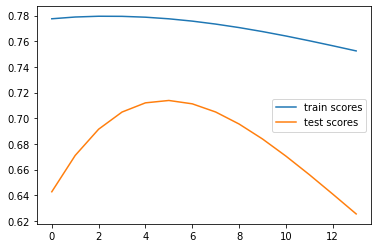

In [81]:
plt.plot(range(0,len(clips)),train_scores,label="train scores")
plt.plot(range(0,len(clips)), test_scores, label="test scores")
plt.legend()
mx_test = max(test_scores)
mx_idx = test_scores.index(mx_test)
train_mx_test = train_scores[mx_idx]
top_clip = clips[mx_idx]
print("Train Score from max Test Score: ", train_mx_test, "\n",
      "Max Test Score: ", mx_test, "\n",
     "Achieved with {} upper clipped RUL".format(top_clip))

#### RandomForest

In [71]:
X_trainL = df1_L1.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1","RUL"], axis=1)


df_test_1_redL = df1t_L1.groupby("ID").last().reset_index()
X_testL = df_test_1_redL.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1"], axis=1)
y_testL = df_RUL_1

In [84]:
clips = np.arange(100,150,10).tolist()
train_scores_rf = []
test_scores_rf = []
for clip in clips:

    y_train_clip = df1_L1["RUL"].clip(upper=clip)


    regr = RandomForestRegressor()
    rf_random_clip = RandomizedSearchCV(estimator=regr, param_distributions=random_grid, random_state=42)
    rf_random_clip.fit(X_trainL, y_train_clip)
    
    n_estimators = list(rf_random_clip.best_params_.values())[0]
    max_depth = list(rf_random_clip.best_params_.values())[1]
    hyper_regr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    hyper_regr.fit(X_trainL, y_train_clip)
    
    rul_train_pred_rf = hyper_regr.predict(X_trainL)
    r2_tr = r2_score(y_train_clip, rul_train_pred_rf)
    train_scores_rf.append(r2_tr)
    print(" TRAIN SCORE WITH {} upper clipped RUL: ".format(clip), r2_score(y_train_clip, rul_train_pred_rf))
    
    rul_test_pred_rf = hyper_regr.predict(X_testL)
    r2_ts = r2_score(y_testL, rul_test_pred_rf)
    test_scores_rf.append(r2_ts)
    print(" TEST SCORE WITH {} upper clipped RUL: ".format(clip), r2_score(y_testL, rul_test_pred_rf))

 TRAIN SCORE WITH 100 upper clipped RUL:  0.9342919296772123
 TEST SCORE WITH 100 upper clipped RUL:  0.7077463989061217
 TRAIN SCORE WITH 110 upper clipped RUL:  0.9330464828584224
 TEST SCORE WITH 110 upper clipped RUL:  0.7472492969869656
 TRAIN SCORE WITH 120 upper clipped RUL:  0.9325438619667092
 TEST SCORE WITH 120 upper clipped RUL:  0.7624362526440829
 TRAIN SCORE WITH 130 upper clipped RUL:  0.9337706450210869
 TEST SCORE WITH 130 upper clipped RUL:  0.7588460520446833


KeyboardInterrupt: 

Train Score from max Test Score:  0.777492716505446 
 Max Test Score:  0.713865506386913 
 Achieved with 125 upper clipped RUL


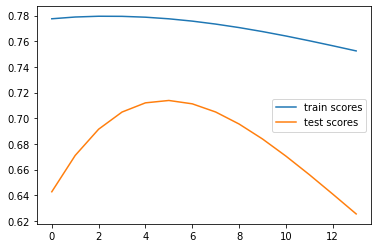

In [81]:
plt.plot(range(0,len(clips)),train_scores,label="train scores")
plt.plot(range(0,len(clips)), test_scores, label="test scores")
plt.legend()
mx_test = max(test_scores)
mx_idx = test_scores.index(mx_test)
train_mx_test = train_scores[mx_idx]
top_clip = clips[mx_idx]
print("Train Score from max Test Score: ", train_mx_test, "\n",
      "Max Test Score: ", mx_test, "\n",
     "Achieved with {} upper clipped RUL".format(top_clip))

#### SVR

In [71]:
X_trainL = df1_L1.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1","RUL"], axis=1)


df_test_1_redL = df1t_L1.groupby("ID").last().reset_index()
X_testL = df_test_1_redL.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1"], axis=1)
y_testL = df_RUL_1

In [ ]:
clips = np.arange(100,160,5).tolist()
train_scores = []
test_scores = []

for clip in clips:
    
    y_train_clip = df1_L1["RUL"].clip(upper=clip)


    svr = SVR(kernel="linear")
    svr.fit(X_trainL, y_train_clip)
    preds_train = svr.predict(X_trainL)
    r2_tr = r2_score(y_train_clip, preds_train)
    train_scores.append(r2_tr)
    print(" TRAIN SCORE WITH {} upper clipped RUL: ".format(clip), r2_score(y_train_clip, preds_train))
    
    preds_test = svr.predict(X_testL)
    r2_ts = r2_score(y_test, preds_test)
    test_scores.append(r2_ts)
    print(" TEST SCORE WITH {} upper clipped RUL: ".format(clip), r2_score(y_testL, preds_test))

Train Score from max Test Score:  0.777492716505446 
 Max Test Score:  0.713865506386913 
 Achieved with 125 upper clipped RUL


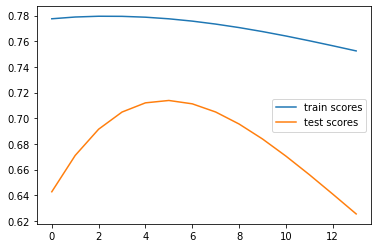

In [81]:
plt.plot(range(0,len(clips)),train_scores,label="train scores")
plt.plot(range(0,len(clips)), test_scores, label="test scores")
plt.legend()
mx_test = max(test_scores)
mx_idx = test_scores.index(mx_test)
train_mx_test = train_scores[mx_idx]
top_clip = clips[mx_idx]
print("Train Score from max Test Score: ", train_mx_test, "\n",
      "Max Test Score: ", mx_test, "\n",
     "Achieved with {} upper clipped RUL".format(top_clip))

### Datasets with Lag2

In [ ]:
df1_L2

In [ ]:
df1t_L2

#### Linear Regression

In [ ]:
X_trainL = df1_L2.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1","RUL"], axis=1)


df_test_1_redL = df1t_L2.groupby("ID").last().reset_index()
X_testL = df_test_1_redL.drop(columns=["operarional_setting_1","operarional_setting_2","operarional_setting_1_lag1","operarional_setting_2_lag1"], axis=1)
y_testL = df_RUL_1

In [ ]:
clips = np.arange(100,170,5).tolist()
train_scores = []
test_scores = []
for clip in clips:
    
    y_trainL = df1_L2["RUL"].clip(upper=clip)
    
    lr = LinearRegression()
    lr.fit(X_trainL, y_trainL)
    
    preds_train = lr.predict(X_trainL)
    r2_tr = r2_score(y_trainL, preds_train)
    train_scores.append(r2_tr)
    print(" TRAIN SCORE WITH {} upper clipped RUL: ".format(clip), r2_score(y_trainL, preds_train))
    
    preds_test = lr.predict(X_testL)
    r2_ts = r2_score(y_testL, preds_test)
    test_scores.append(r2_ts)
    print(" TEST SCORE WITH {} upper clipped RUL: ".format(clip), r2_score(y_testL, preds_test))

Train Score from max Test Score:  0.777492716505446 
 Max Test Score:  0.713865506386913 
 Achieved with 125 upper clipped RUL


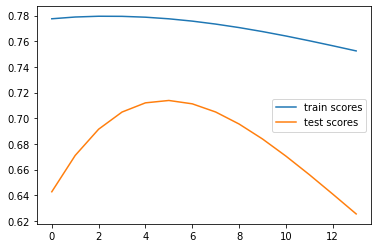

In [81]:
plt.plot(range(0,len(clips)),train_scores,label="train scores")
plt.plot(range(0,len(clips)), test_scores, label="test scores")
plt.legend()
mx_test = max(test_scores)
mx_idx = test_scores.index(mx_test)
train_mx_test = train_scores[mx_idx]
top_clip = clips[mx_idx]
print("Train Score from max Test Score: ", train_mx_test, "\n",
      "Max Test Score: ", mx_test, "\n",
     "Achieved with {} upper clipped RUL".format(top_clip))